In [1]:
import psycopg2
import pandas as pd
import seaborn as sns
import matplotlib as plt
import scipy

/Users/candyg/opt/anaconda3/envs/PythonData/lib/python3.7/site-packages/psycopg2/__init__.py:144: UserWarning: The psycopg2 wheel package will be renamed from release 2.8; in order to keep installing from binary please use "pip install psycopg2-binary" instead. For details see: <http://initd.org/psycopg/docs/install.html#binary-install-from-pypi>.
  """)


In [2]:
# connect to sql
connection = psycopg2.connect(
    host = 'diasterdb2.cbyvxmyzmzyh.us-east-2.rds.amazonaws.com',
    port = 5432,
    user = 'postgres',
    password = 'group7_db',
    database='diasterdb'
    )
cursor=connection.cursor()

In [3]:
# list tables in sql
sql = """
SELECT "table_name","column_name", "data_type", "table_schema"
FROM INFORMATION_SCHEMA.COLUMNS
WHERE "table_schema" = 'public'
ORDER BY table_name  
"""
pd.read_sql(sql, con=connection)

,table_name,column_name,data_type,table_schema
0,FPIS,NAME,character varying,public
1,FPIS,FIPS_ID,integer,public
2,TEMPERATURE,DATE,date,public
3,TEMPERATURE,Country,character varying,public
4,TEMPERATURE,AverageTemperatureUncertaintyF,numeric,public
5,TEMPERATURE,STATE,character varying,public
6,TEMPERATURE,TEMPERATURE_ID,integer,public
7,TEMPERATURE,Fahrenheit,numeric,public
8,TEMPERATURE,AverageTemperatureF,numeric,public
9,USDisaster,pa_program_declared,integer,public


In [4]:
# dictionary to convert between full state names and abbreviations
us_state_abbrev = {
    'Alabama': 'AL',
    'Alaska': 'AK',
    'American Samoa': 'AS',
    'Arizona': 'AZ',
    'Arkansas': 'AR',
    'California': 'CA',
    'Colorado': 'CO',
    'Connecticut': 'CT',
    'Delaware': 'DE',
    'District of Columbia': 'DC',
    'Florida': 'FL',
    'Georgia': 'GA',
    'Guam': 'GU',
    'Hawaii': 'HI',
    'Idaho': 'ID',
    'Illinois': 'IL',
    'Indiana': 'IN',
    'Iowa': 'IA',
    'Kansas': 'KS',
    'Kentucky': 'KY',
    'Louisiana': 'LA',
    'Maine': 'ME',
    'Maryland': 'MD',
    'Massachusetts': 'MA',
    'Michigan': 'MI',
    'Minnesota': 'MN',
    'Mississippi': 'MS',
    'Missouri': 'MO',
    'Montana': 'MT',
    'Nebraska': 'NE',
    'Nevada': 'NV',
    'New Hampshire': 'NH',
    'New Jersey': 'NJ',
    'New Mexico': 'NM',
    'New York': 'NY',
    'North Carolina': 'NC',
    'North Dakota': 'ND',
    'Northern Mariana Islands':'MP',
    'Ohio': 'OH',
    'Oklahoma': 'OK',
    'Oregon': 'OR',
    'Pennsylvania': 'PA',
    'Puerto Rico': 'PR',
    'Rhode Island': 'RI',
    'South Carolina': 'SC',
    'South Dakota': 'SD',
    'Tennessee': 'TN',
    'Texas': 'TX',
    'Utah': 'UT',
    'Vermont': 'VT',
    'Virgin Islands': 'VI',
    'Virginia': 'VA',
    'Washington': 'WA',
    'West Virginia': 'WV',
    'Wisconsin': 'WI',
    'Wyoming': 'WY'
}

In [5]:
#store sql table in dataframe
sql_USDisaster = """ SELECT * FROM public."USDisaster" """
df_US_disasters = pd.read_sql(sql_USDisaster, con=connection)
df_US_disasters.tail(3)

,fema_declaration,disaster_number,state,declaration_type,declaration_date,fy_declared,incident_type,declaration_title,ih_program_declared,ia_program_declared,pa_program_declared,hm_program_declared,incident_begin_date,fips,place_code,designated_area,declaration_request_number,hash,last_refresh,id
61803,DR-4610-CA,4610,CA,DR,2021-08-24,2021,Fire,Wildfires,1,0,1,1,2021-07-14,6035,99035,Lassen (County),21087,74f77c93f158659bf1dd9f871227a9993244478d,2021-08-25,6125a937434e34d5ee5cd8a3
61804,DR-4610-CA,4610,CA,DR,2021-08-24,2021,Fire,Wildfires,1,0,1,1,2021-07-14,6057,99057,Nevada (County),21087,dde89f65556f220034ac16cfa66abf7d135962da,2021-08-25,6125a937434e34d5ee5cd8c1
61805,FM-5416-CA,5416,CA,FM,2021-08-25,2021,Fire,French Fire,0,0,1,1,2021-08-24,6029,99029,Kern (County),21088,b2120fdada11e2ceefe3714927afe2443c719812,2021-08-25,61266e5e434e34d5eee6f25e


In [8]:
# extract out month and year and make separate columns -- use this later to group by month/year
df_US_disasters['declaration_date'].astype(str)
df_US_disasters['year'] = pd.DatetimeIndex(df_US_disasters['declaration_date']).year
df_US_disasters['month'] = pd.DatetimeIndex(df_US_disasters['declaration_date']).month
df_US_disasters['month_year'] = pd.to_datetime(df_US_disasters['declaration_date']).dt.to_period('M')
df_US_disasters.to_csv('US_Disasters_MY', index=False)

In [8]:
#drop columns that will not be used as features in ML algorithm
df_US_disasters_clean = df_US_disasters.drop(columns=['ia_program_declared', 
                          'last_refresh', 'hash','id', 'ih_program_declared', 'pa_program_declared', 
                          'hm_program_declared','month','place_code'])


In [9]:
#group disasters by year
num_disasters_series = df_US_disasters_clean.groupby("year")['incident_type'].count()
df_num_disasters_us = pd.Series(num_disasters_series).to_frame().reset_index()
df_num_disasters_us=df_num_disasters_us.rename(columns = {"incident_type":"incident frequency"})


In [10]:
# get temperature table from sql
sql_temp = """ SELECT * FROM public."TEMPERATURE" """
df_US_temperatures = pd.read_sql(sql_temp, con=connection)

In [11]:
#same idea as above with disasters table; extract out month and year from date and add into separate columns
df_US_temperatures['DATE'].astype(str)
df_US_temperatures['year'] = pd.DatetimeIndex(df_US_temperatures['DATE']).year
df_US_temperatures['month'] = pd.DatetimeIndex(df_US_temperatures['DATE']).month
df_US_temperatures['month_year'] = pd.to_datetime(df_US_temperatures['DATE']).dt.to_period('M')
df_US_temperatures.head()

,TEMPERATURE_ID,DATE,STATE,Country,Fahrenheit,AverageTemperatureF,AverageTemperatureUncertaintyF,year,month,month_year
0,1,1953-01-01,Alabama,United States,119.381,49.4762,32.2808,1953,1,1953-01
1,2,1953-02-01,Alabama,United States,118.634,49.3268,32.2286,1953,2,1953-02
2,3,1953-03-01,Alabama,United States,164.363,58.4726,32.1728,1953,3,1953-03
3,4,1953-04-01,Alabama,United States,175.298,60.6596,32.2916,1953,4,1953-04
4,5,1953-05-01,Alabama,United States,241.619,73.9238,32.3420,1953,5,1953-05


In [12]:
#convert to state abbreviations
df_US_temperatures['STATE'] = df_US_temperatures['STATE'].map(us_state_abbrev).fillna(df_US_temperatures['STATE'])
df_US_temperatures

,TEMPERATURE_ID,DATE,STATE,Country,Fahrenheit,AverageTemperatureF,AverageTemperatureUncertaintyF,year,month,month_year
0,1,1953-01-01,AL,United States,119.381,49.4762,32.2808,1953,1,1953-01
1,2,1953-02-01,AL,United States,118.634,49.3268,32.2286,1953,2,1953-02
2,3,1953-03-01,AL,United States,164.363,58.4726,32.1728,1953,3,1953-03
3,4,1953-04-01,AL,United States,175.298,60.6596,32.2916,1953,4,1953-04
4,5,1953-05-01,AL,United States,241.619,73.9238,32.3420,1953,5,1953-05
...,...,...,...,...,...,...,...,...,...,...
37172,37173,2013-05-01,WY,United States,127.463,51.0926,32.3744,2013,5,2013-05
37173,37174,2013-06-01,WY,United States,178.403,61.2806,32.4968,2013,6,2013-06
37174,37175,2013-07-01,WY,United States,213.998,68.3996,32.2394,2013,7,2013-07
37175,37176,2013-08-01,WY,United States,208.589,67.3178,32.3906,2013,8,2013-08


In [13]:
#make dataframe of year and average tempearature per year
series_temp = df_US_temperatures.groupby("year")['AverageTemperatureF'].mean()
df_annual_US_temp = pd.Series(series_temp).to_frame().reset_index()
df_annual_US_temp

,year,AverageTemperatureF
0,1953,53.365676
1,1954,52.888285
2,1955,51.751159
3,1956,51.934794
4,1957,52.198468
...,...,...
56,2009,52.081388
57,2010,53.119179
58,2011,53.259968
59,2012,54.971315


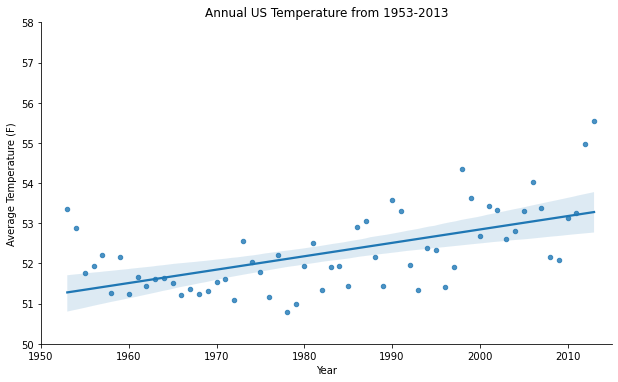

In [14]:
# plot annual US average temperature from 1953-2013
# df_annual_US_temp.plot.line()
#ax = sns.lineplot(data=df_annual_US_temp, x="year", y="AverageTemperatureF")
ax = sns.lmplot(x="year", y="AverageTemperatureF", data=df_annual_US_temp,aspect=1.7, height=5,markers=['o'], scatter_kws={'s':20})
ax.set(title='Annual US Temperature from 1953-2013', ylabel='Average Temperature (F)', xlabel="Year")
ax.set(xlim=(1950, 2015))
ax.set(ylim=(50, 58))

In [15]:
#merge incident frequency and average temperature
df_combined = pd.merge(left = df_num_disasters_us, right = df_annual_US_temp, on = "year")

In [16]:
df_combined.tail(10)

,year,incident frequency,AverageTemperatureF
51,2004,1853,52.804868
52,2005,4736,53.309032
53,2006,975,54.029271
54,2007,1639,53.388056
55,2008,2300,52.148576
56,2009,1264,52.081388
57,2010,1631,53.119179
58,2011,2690,53.259968
59,2012,1292,54.971315
60,2013,769,55.539726


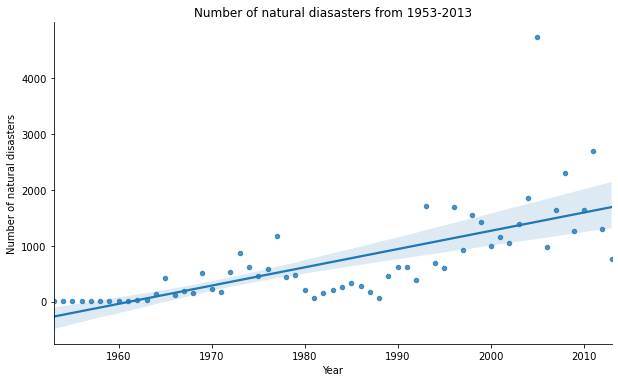

In [17]:
ax = sns.lmplot(x="year", y="incident frequency", data=df_combined, aspect=1.7, height=5,markers=['o'], scatter_kws={'s':20})
ax.set(title='Number of natural diasasters from 1953-2013', ylabel='Number of natural disasters', xlabel="Year")
#ax.set(xlim=(0, 3000))
#ax.set(ylim=(50, 58))

In [18]:
#drop covid outlier (bio disaster)
df_combined_no_bio = df_combined.drop(index=52)

In [19]:
df_combined_no_bio.to_csv('temperature_disaster_frequency.csv', index=False)

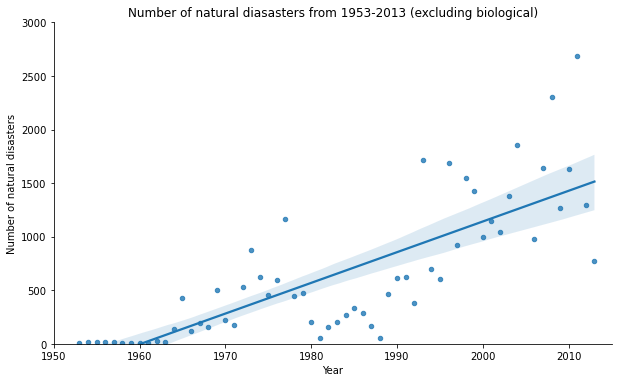

In [20]:
ax = sns.lmplot(x="year", y="incident frequency", data= df_combined_no_bio, aspect=1.7, height=5,markers=['o'], scatter_kws={'s':20})
ax.set(title='Number of natural diasasters from 1953-2013 (excluding biological)', ylabel='Number of natural disasters', xlabel="Year")
ax.set(xlim=(1950, 2015))
ax.set(ylim=(0, 3000))

The pearson r correlation coefficient is 0.4127770588484668 and the p value is 0.0010470388584527819.


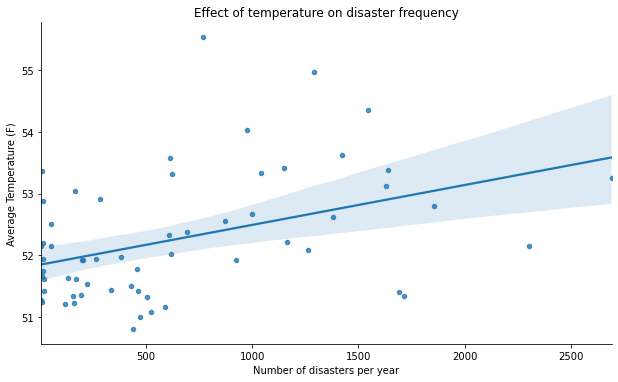

In [21]:
ax = sns.lmplot(x="incident frequency", y="AverageTemperatureF", data=df_combined_no_bio, fit_reg = True, aspect=1.7, height=5,markers=['o'], scatter_kws={'s':20})
ax.set(title='Effect of temperature on disaster frequency', ylabel='Average Temperature (F)', xlabel="Number of disasters per year")
# ax.set(xlim=(0, 3000))
# ax.set(ylim=(50, 58))

# slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(df_combined['incident frequency'],df_combined['AverageTemperatureF'])
# label_line_1 = r'$y={0:.1f}x+{1:.1f}'.format(slope,intercept)
# L_labels.set_text(label_line_1)

# slope, intercept, r_value, pv, se = scipy.stats.linregress(df_combined['incident frequency'],df_combined['AverageTemperatureF'])

# sns.regplot(x="incident frequency", y="AverageTemperatureF", data=df_combined, 
#       ci=None, label="y={0:.1f}x+{1:.1f}".format(slope, intercept, r_value, p_value)).legend(loc="best")

r, p = scipy.stats.pearsonr(df_combined_no_bio['incident frequency'], df_combined_no_bio['AverageTemperatureF'])
print (f'The pearson r correlation coefficient is {r} and the p value is {p}.')